In [993]:
# matplotlib v3.7.1
import matplotlib.pyplot as plt
import matplotlib as mpl

# pandas v1.5.3
import pandas as pd

# numpy v1.24.3
import numpy as np

# seaborn v0.12.2
import seaborn as sns

import scipy.stats as st

raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_23441/3543019911.py:16: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")


# Data Exploration

In [994]:
general_information = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "generic_name",
    "quantity",
]

tags = [
    "pnns_groups_1",
    "pnns_groups_2",
    "packaging",
    "packaging_tags",
    "brands",
    "brands_tags",
    "categories",
    "categories_tags",
    "categories_fr",
    "origins",
    "origins_tags",
    "manufacturing_places",
    "manufacturing_places_tags",
    "labels",
    "labels_tags",
    "labels_fr",
    "emb_codes",
    "emb_codes_tags",
    "first_packaging_code_geo",
    "cities",
    "cities_tags",
    "states",
    "states_fr",
    "states_tags",
    "purchase_places",
    "stores",
    "countries",
    "countries_tags",
    "countries_fr",
]

ingredients = [
    "ingredients_text",
    "traces",
    "traces_fr",
    "traces_tags",
]

misc_data = [
    "serving_size",
    "no_nutriments",
    "additives_n",
    "additives",
    "additives_fr",
    "additives_tags",
    "allergens",
    "allergens_fr",
    "ingredients_from_palm_oil_n",
    "ingredients_from_palm_oil",
    "ingredients_from_palm_oil_tags",
    "ingredients_that_may_be_from_palm_oil_n",
    "ingredients_that_may_be_from_palm_oil",
    "ingredients_that_may_be_from_palm_oil_tags",
    "nutrition_grade_fr",
    "main_category",
    "main_category_fr",
    "image_url",
    "image_small_url",
]

nutrition_facts = [
    "energy_100g",
    "energy-from-fat_100g",
    "fat_100g",
    "saturated-fat_100g",
    "butyric-acid_100g",
    "caproic-acid_100g",
    "caprylic-acid_100g",
    "capric-acid_100g",
    "lauric-acid_100g",
    "myristic-acid_100g",
    "palmitic-acid_100g",
    "stearic-acid_100g",
    "arachidic-acid_100g",
    "behenic-acid_100g",
    "lignoceric-acid_100g",
    "cerotic-acid_100g",
    "montanic-acid_100g",
    "melissic-acid_100g",
    "monounsaturated-fat_100g",
    "polyunsaturated-fat_100g",
    "omega-3-fat_100g",
    "alpha-linolenic-acid_100g",
    "eicosapentaenoic-acid_100g",
    "docosahexaenoic-acid_100g",
    "omega-6-fat_100g",
    "linoleic-acid_100g",
    "arachidonic-acid_100g",
    "gamma-linolenic-acid_100g",
    "dihomo-gamma-linolenic-acid_100g",
    "omega-9-fat_100g",
    "oleic-acid_100g",
    "elaidic-acid_100g",
    "gondoic-acid_100g",
    "mead-acid_100g",
    "erucic-acid_100g",
    "nervonic-acid_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "sucrose_100g",
    "glucose_100g",
    "fructose_100g",
    "lactose_100g",
    "maltose_100g",
    "maltodextrins_100g",
    "starch_100g",
    "polyols_100g",
    "fiber_100g",
    "proteins_100g",
    "casein_100g",
    "serum-proteins_100g",
    "nucleotides_100g",
    "salt_100g",
    "sodium_100g",
    "alcohol_100g",
    "vitamin-a_100g",
    "beta-carotene_100g",
    "vitamin-d_100g",
    "vitamin-e_100g",
    "vitamin-k_100g",
    "vitamin-c_100g",
    "vitamin-b1_100g",
    "vitamin-b2_100g",
    "vitamin-pp_100g",
    "vitamin-b6_100g",
    "vitamin-b9_100g",
    "folates_100g",
    "vitamin-b12_100g",
    "biotin_100g",
    "pantothenic-acid_100g",
    "silica_100g",
    "bicarbonate_100g",
    "potassium_100g",
    "chloride_100g",
    "calcium_100g",
    "phosphorus_100g",
    "iron_100g",
    "magnesium_100g",
    "zinc_100g",
    "copper_100g",
    "manganese_100g",
    "fluoride_100g",
    "selenium_100g",
    "chromium_100g",
    "molybdenum_100g",
    "iodine_100g",
    "caffeine_100g",
    "taurine_100g",
    "ph_100g",
    "fruits-vegetables-nuts_100g",
    "collagen-meat-protein-ratio_100g",
    "cocoa_100g",
    "chlorophyl_100g",
    "carbon-footprint_100g",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "nutrition_grade_uk",
    "glycemic-index_100g",
    "water-hardness_100g",
]

data_sections = {
    "General Information": general_information,
    "Tags": tags,
    "Ingredients": ingredients,
    "Miscellaneous Data": misc_data,
    "Nutrition Facts": nutrition_facts,
}

In [995]:
display(raw_products.shape)

(320772, 162)

## Exploration by Section

### General Information

In [996]:
raw_products[general_information].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
116335,50428551735,http://world-fr.openfoodfacts.org/produit/0504...,usda-ndb-import,1489071211,2017-03-09T14:53:31Z,1489071211,2017-03-09T14:53:31Z,"Dark Chocolate Bar, Almond & Sea Salt",NaN,NaN
140556,748252081193,http://world-fr.openfoodfacts.org/produit/0748...,usda-ndb-import,1489075493,2017-03-09T16:04:53Z,1489075493,2017-03-09T16:04:53Z,"Big Watt, Circuit Bender Cold Press Coffee",NaN,NaN
282273,5901713005021,http://world-fr.openfoodfacts.org/produit/5901...,tacite,1432228601,2015-05-21T17:16:41Z,1432228956,2015-05-21T17:22:36Z,Mélange de petits pois non calibrés,NaN,400 g (265 g égoutté)
19217,21883148214,http://world-fr.openfoodfacts.org/produit/0021...,usda-ndb-import,1489141423,2017-03-10T10:23:43Z,1489141424,2017-03-10T10:23:44Z,"Ambassador, Colombian Style Champagne Cola",NaN,NaN
2024,11110024466,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489093705,2017-03-09T21:08:25Z,1489093705,2017-03-09T21:08:25Z,Broccoli & Cauliflower,NaN,NaN


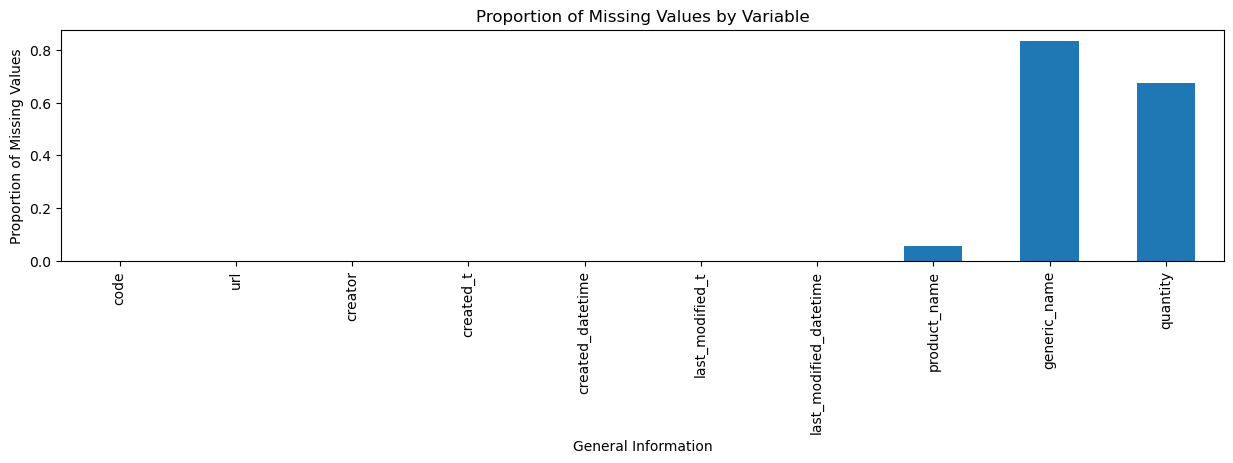

In [997]:
def plot_missing_data(df, section_name):
    plt.figure(figsize=[15, 3])
    df.isna().mean().plot(kind="bar")
    plt.title("Proportion of Missing Values by Variable")
    plt.xlabel(section_name)
    plt.ylabel("Proportion of Missing Values")
    plt.show()


plot_missing_data(raw_products[general_information], "General Information")

### Tags

In [998]:
raw_products[tags].sample(5)

,pnns_groups_1,pnns_groups_2,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,...,cities,cities_tags,states,states_fr,states_tags,purchase_places,stores,countries,countries_tags,countries_fr
196584,Salty snacks,Appetizers,"Sachet,plastique,Atmosphère protectrice","sachet,plastique,atmosphere-protectrice","Lay's,PepsiCo","lay-s,pepsico","Snacks salés,Apéritif,Chips et frites,Chips,Ch...","en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,...,NaN,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","Bar-le-Duc,France",Leclerc,France,en:france,France
123701,unknown,unknown,NaN,NaN,NaN,NaN,fr:Ricotta,fr:ricotta,Ricotta,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,intermarche,France,en:france,France
45827,NaN,NaN,NaN,NaN,Sanchis Mira,sanchis-mira,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
260954,NaN,NaN,Glas,glas,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","A compléter,Informations nutritionnelles à com...","en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,en:FR,en:france,France
176720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","Vide,A compléter,Informations nutritionnelles ...","en:empty,en:to-be-completed,en:nutrition-facts...",NaN,NaN,en:TN,en:tunisia,Tunisie


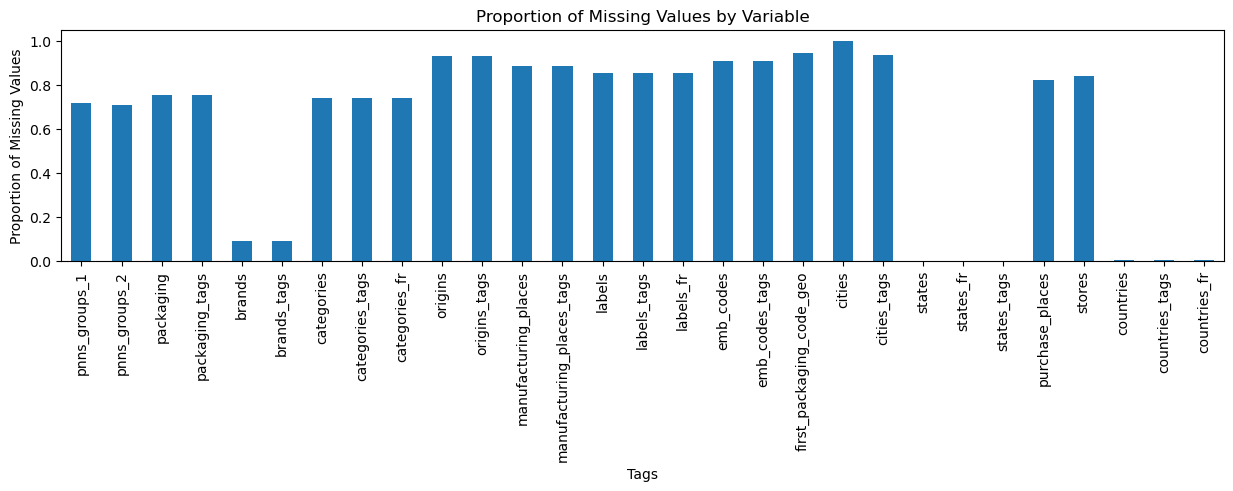

In [999]:
plot_missing_data(raw_products[tags], "Tags")

### Ingredients

In [1000]:
raw_products[ingredients].sample(5)

,ingredients_text,traces,traces_fr,traces_tags
218336,"Filet de canard : 96%, sel, sel de Guérande: 1...",NaN,NaN,NaN
157954,"Honey*, almonds*, sunflower seeds*, pecans*, w...",NaN,NaN,NaN
288189,NaN,NaN,NaN,NaN
103512,"Skip jack tuna, water, sea salt.",NaN,NaN,NaN
69487,Whole wheat matzo meal (passover whole wheat f...,NaN,NaN,NaN


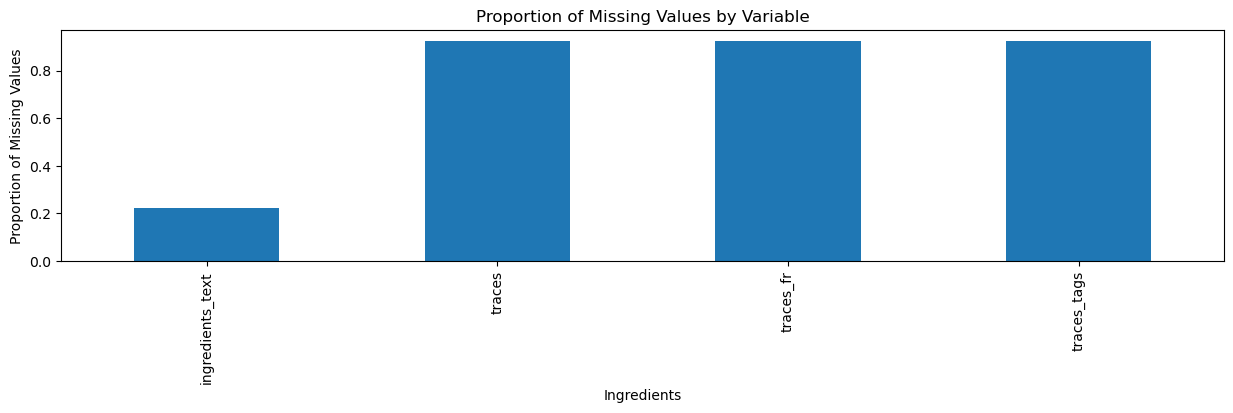

In [1001]:
plot_missing_data(raw_products[ingredients], "Ingredients")

### Miscellaneous Data

In [1002]:
raw_products[misc_data].sample(5)

,serving_size,no_nutriments,additives_n,additives,additives_fr,additives_tags,allergens,allergens_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,main_category,main_category_fr,image_url,image_small_url
144965,32 g (2 Tbsp),NaN,2.0,[ soy-sauce -> en:soy-sauce ] [ sauce -> en...,"E330 - Acide citrique,E415 - Gomme xanthane","en:e330,en:e415",NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,e,NaN,NaN,NaN,NaN
203472,NaN,NaN,0.0,[ haricots-lingots-34 -> fr:haricots-lingots-...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,en:meals-with-meat,Plats à base de viande,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...
159288,89 g (1 SERVING),NaN,2.0,[ enriched-flour -> en:enriched-flour ] [ f...,"E375 - Acide nicotinique,E101 - Riboflavine","en:e375,en:e101",NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81931,56 g (2 oz),NaN,0.0,[ sardines -> en:sardines ] [ tomato-sauce-...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d,NaN,NaN,NaN,NaN
191253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...


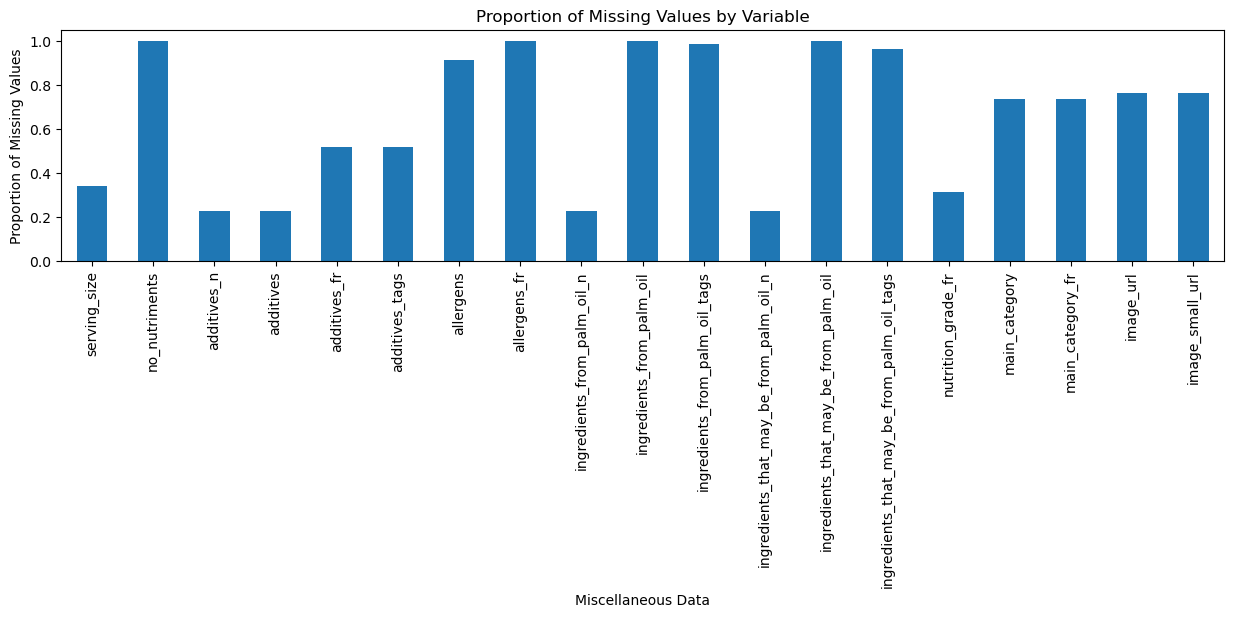

In [1003]:
plot_missing_data(raw_products[misc_data], "Miscellaneous Data")

### Nutrition Facts

In [1004]:
raw_products[nutrition_facts].sample(5)

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,...,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_uk,glycemic-index_100g,water-hardness_100g
44168,368.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
180631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226069,397.0,NaN,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
279773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248728,1592.0,NaN,1.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN


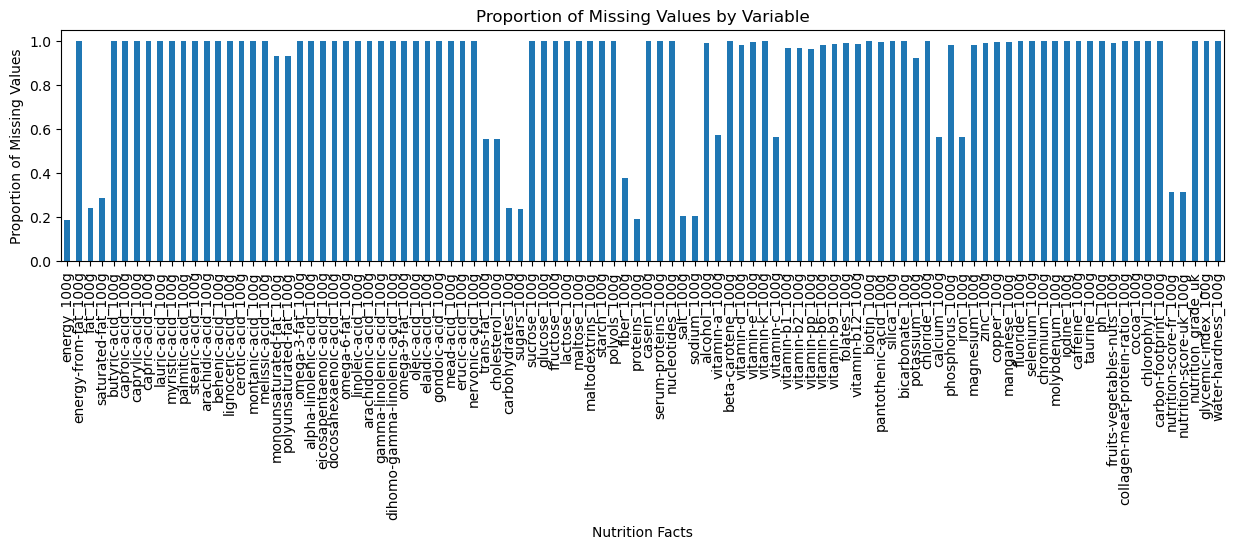

In [1005]:
plot_missing_data(raw_products[nutrition_facts], "Nutrition Facts")

## Feature Selection 

The previous graphs show that there is a lot of missing data in each section, with many features containing more than 50% of null values. 

To start the cleaning process, we will set the cutoff at 50% to have a smaller data set. 

---

In [1045]:
products = raw_products.loc[:, raw_products.isna().mean() < 0.5]

We can also remove the variables with duplicated information along with those that don't carry useful information:

In [1007]:
products.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [1047]:
products = products.drop(
    columns=[
        "creator",
        "created_t",
        "url",
        "last_modified_datetime",
        "created_datetime",
        "brands",
        "ingredients_that_may_be_from_palm_oil_n",
        "last_modified_t",
        "brands_tags",
        "countries_tags",
        "countries",
        "countries_fr",
        "states_tags",
        "additives",
        "states",
        "states_fr",
        "nutrition-score-uk_100g",
        "serving_size",
        "ingredients_text",
        "ingredients_from_palm_oil_n",
        "additives_n",
    ]
)

KeyError: "['creator', 'created_t', 'url', 'last_modified_datetime', 'created_datetime', 'brands', 'ingredients_that_may_be_from_palm_oil_n', 'last_modified_t', 'brands_tags', 'countries_tags', 'countries', 'countries_fr', 'states_tags', 'additives', 'states', 'states_fr', 'nutrition-score-uk_100g', 'serving_size', 'ingredients_text', 'ingredients_from_palm_oil_n', 'additives_n'] not found in axis"

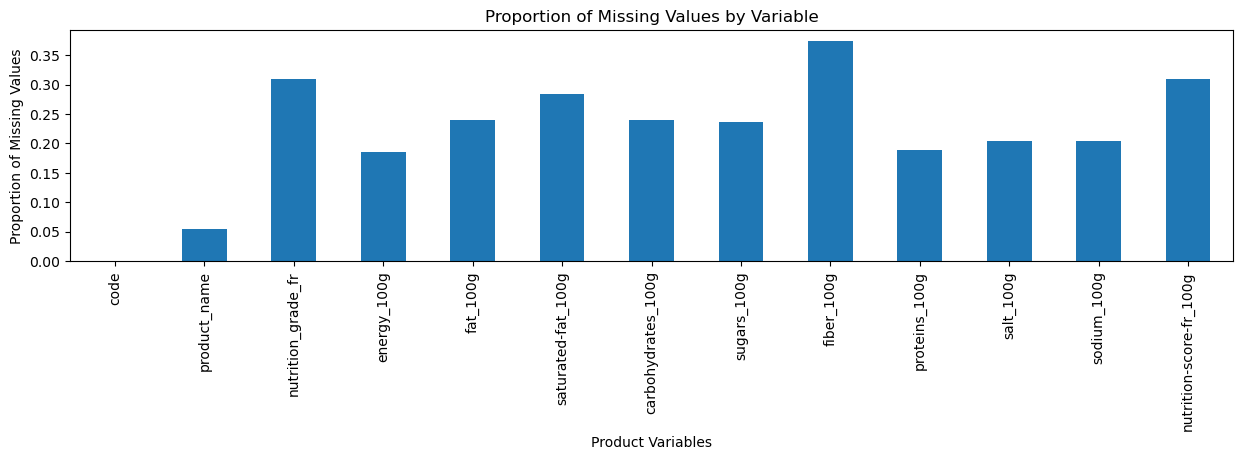

In [1048]:
plot_missing_data(products, "Product Variables")

Check for duplicated entries: 

In [1010]:
products.loc[products.duplicated(subset="code")]

,code,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
481,16117,Colossal Olives With Jalapeno Peppers,NaN,347.0,8.33,NaN,0.00,NaN,NaN,0.00,3.38582,1.333000,NaN
519,24600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233,Super chicken spinach & quinoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001,Bramley Apple Crumble,d,1192.0,NaN,7.40,NaN,21.60,2.2,3.20,0.23000,0.090551,12.0
1337,9800800056,Hazelnut Spread + Breadsticks,e,2171.0,26.92,9.62,65.38,44.23,3.8,7.69,0.63500,0.250000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280571,54491472,Coca-Cola,e,180.0,0.00,0.00,10.60,10.60,0.0,0.00,0.00000,0.000000,14.0
280572,54491496,Diet coke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281938,58449410003,Natures Path organic frosted berry toaster pas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300376,78742087108,Juice Cocktail Blended With Another Juice From...,NaN,192.0,0.00,NaN,11.67,11.67,NaN,0.00,0.05334,0.021000,NaN


In [1049]:
products = products.loc[~products.duplicated(subset="code")]

We can remove entries that contain less than 20% data aside from general information:

In [1050]:
nutrition_info = products.iloc[:, 3:].columns

products_to_remove = products.loc[products[nutrition_info].isna().mean(axis=1) > 0.8]

len(products_to_remove) / len(products) * 100

18.408552920886105

In [1051]:
products = products.drop(products_to_remove.index)

In [1056]:
products.shape

(261614, 12)

# Data Cleaning

Check the column types to see whether there is erroneous data:

In [1014]:
products.dtypes

code                        object
product_name                object
nutrition_grade_fr          object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

The types are coherent with the nature of the feature

---

## Outliers

In [1055]:
products.set_index("code", inplace=True)
products.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,2.606910e+05,243386.000000,229485.000000,243494.000000,244817.000000,200817.000000,259814.000000,255414.000000,255373.000000,220957.000000
mean,1.142165e+03,12.705761,5.129718,32.074492,15.992789,2.861833,7.076689,2.028636,0.798802,9.173432
std,6.452274e+03,17.568809,8.013402,29.733526,22.321326,12.869511,8.409427,128.293543,50.513321,9.055755
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


The min and max values of nutrition information variables suggest that there are some outliers. The rest of the variables however seem to have coherent data.

---


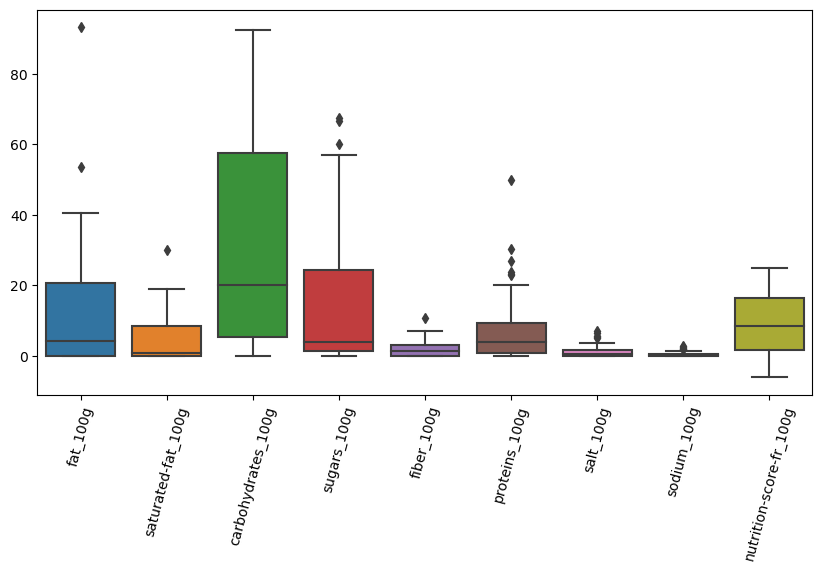

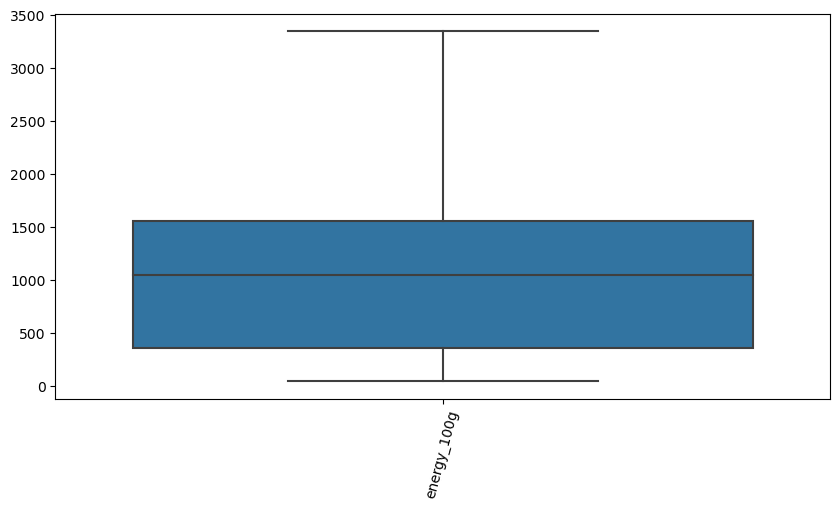

In [1057]:
sample_outliers = products.sample(50).index


def map_outliers(df):
    plt.figure(figsize=[10, 5])
    sns.boxplot(df)
    plt.xticks(rotation=75)
    plt.show()


map_outliers(products.loc[sample_outliers, products.columns != "energy_100g"])
map_outliers(products.loc[sample_outliers, products.columns == "energy_100g"])

### Testing IQR method

In [1058]:
products.isna().mean().mean()

0.07832850433590455

In [1059]:
def remove_outliers(df):
    Q1 = np.nanpercentile(df, 25)
    Q3 = np.nanpercentile(df, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df


df = products.loc[:, ~products.columns.isin(["product_name", "nutrition_grade_fr"])]
products_without_outliers = df.apply(remove_outliers, axis=0)
products_without_outliers.isna().mean().mean()

0.11601022881038477

The IQR method removes 10% of data, which seems way too much. 
In addition, the product nutrition values are not really comparable using such method, therefore a lot of values would be wrongly considered outliers.

We can try applying this method to a subgroup of products that are more likely to have similar value range:

In [1060]:
products = products.merge(
    raw_products[["pnns_groups_1", "pnns_groups_2", "code"]],
    left_index=True,
    right_on="code",
)

In [1061]:
products["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Fish Meat Eggs', 'Beverages', 'Fat and sauces',
       'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes',
       'salty-snacks'], dtype=object)

In [1062]:
products.loc[
    products["pnns_groups_1"].str.contains("unknown", case=False, na=False),
    "pnns_groups_1",
] = np.nan
products.loc[
    products["pnns_groups_1"].str.contains(
        "vegetable|fruit", case=False, regex=True, na=False
    ),
    "pnns_groups_1",
] = "Fruits and vegetables"
products.loc[
    products["pnns_groups_1"].str.contains("Sugary", case=False, na=False),
    "pnns_groups_1",
] = "Sugary snacks"
products.loc[
    products["pnns_groups_1"].str.contains("sauces", case=False, na=False),
    "pnns_groups_1",
] = "Fat and sauces"
products.loc[
    products["pnns_groups_1"].str.contains("Salty", case=False, na=False),
    "pnns_groups_1",
] = "Salty snacks"
products.loc[
    products["pnns_groups_1"].str.contains(
        "dairy|milk", case=False, regex=True, na=False
    ),
    "pnns_groups_1",
] = "Milk and dairy products"
products.loc[
    products["pnns_groups_1"].str.contains("Composite", case=False, na=False),
    "pnns_groups_1",
] = "Composite foods"
products.loc[
    products["pnns_groups_1"].str.contains(
        "Fish|Meat|Eggs", case=False, regex=True, na=False
    ),
    "pnns_groups_1",
] = "Fish Meat Eggs"
products.loc[
    products["pnns_groups_1"].str.contains(
        "cereals|potatoes", case=False, regex=True, na=False
    ),
    "pnns_groups_1",
] = "Cereals and potatoes"
products.loc[
    products["pnns_groups_1"].str.contains("Beverage", case=False, na=False),
    "pnns_groups_1",
] = "Beverages"

products["pnns_groups_1"].unique()

array([nan, 'Fruits and vegetables', 'Sugary snacks', 'Composite foods',
       'Fish Meat Eggs', 'Beverages', 'Fat and sauces',
       'Cereals and potatoes', 'Milk and dairy products', 'Salty snacks'],
      dtype=object)

In [1063]:
products["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'Soups', 'Legumes',
       'Cereals', 'Fruits', 'Milk and yogurt', 'Fats',
       'Non-sugared beverages', 'Cheese', 'Chocolate products',
       'Sandwich', 'Bread', 'Nuts', 'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'vegetables', 'pastries', 'Dairy desserts',
       'Alcoholic beverages', 'Fruit nectars', 'fruits',
       'Salty and fatty products', 'Tripe dishes', 'cereals', 'legumes',
       'nuts'], dtype=object)

In [1064]:
products.loc[
    products["pnns_groups_2"].str.contains("unknown", case=False, na=False),
    "pnns_groups_2",
] = np.nan
products.loc[products["pnns_groups_2"].notna(), "pnns_groups_2"] = products.loc[
    products["pnns_groups_2"].notna(), "pnns_groups_2"
].str.capitalize()

products["pnns_groups_2"].unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Pizza pies and quiche',
       'Meat', 'Sweets', 'Sweetened beverages', 'Dressings and sauces',
       'One-dish meals', 'Soups', 'Legumes', 'Cereals', 'Fruits',
       'Milk and yogurt', 'Fats', 'Non-sugared beverages', 'Cheese',
       'Chocolate products', 'Sandwich', 'Bread', 'Nuts',
       'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Pastries', 'Dairy desserts', 'Alcoholic beverages',
       'Fruit nectars', 'Salty and fatty products', 'Tripe dishes'],
      dtype=object)

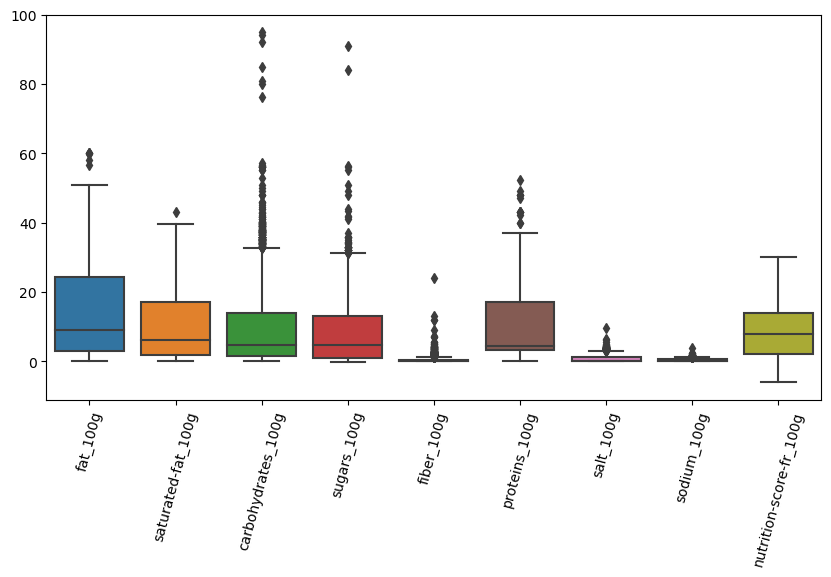

In [1065]:
dairy_products = products.loc[products["pnns_groups_1"] == "Milk and dairy products"]

map_outliers(dairy_products.loc[:, dairy_products.columns != "energy_100g"])

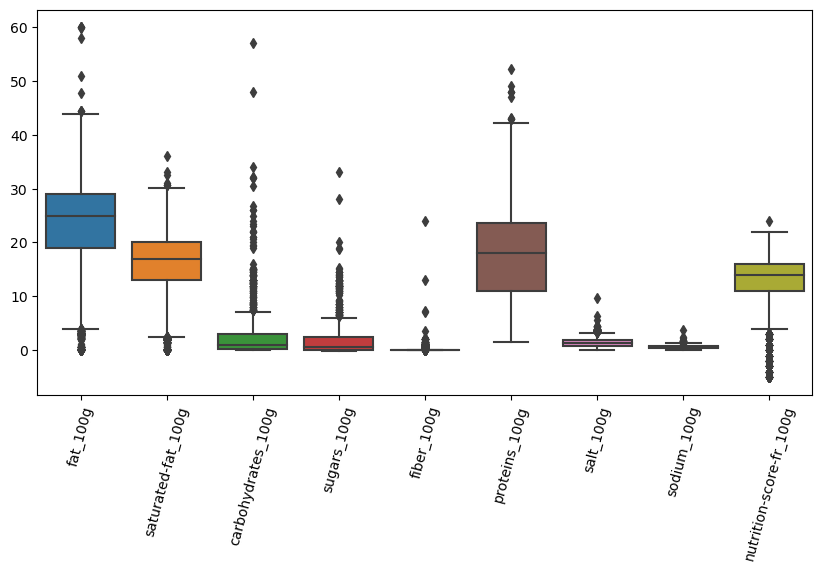

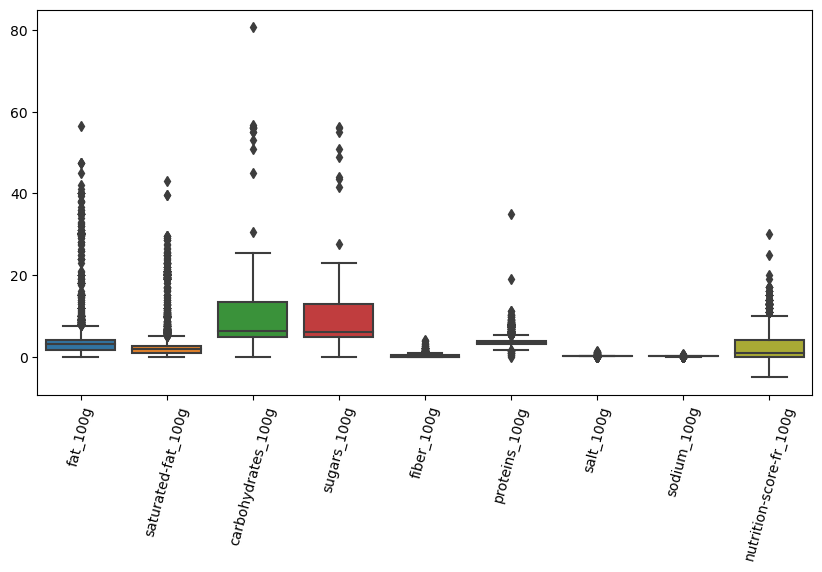

In [1066]:
cheeses = products.loc[products["pnns_groups_2"] == "Cheese"]
milk_yogurts = products.loc[products["pnns_groups_2"] == "Milk and yogurt"]

map_outliers(cheeses.loc[:, cheeses.columns != "energy_100g"])
map_outliers(milk_yogurts.loc[:, milk_yogurts.columns != "energy_100g"])

There seems to be too many outliers identified with the IQR method even when products are grouped by pnns groups. 

We will therefore try a more business oriented approach to handling outliers

---

### Removing nutritional information outliers

Identifying outliers by the non null values outside of the 0-100 range for nutrition information:

In [1067]:
nutrition_facts = [
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
]


def count_outliers():
    print(
        len(
            np.where(
                ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
                & products[nutrition_facts].notna()
            )[0]
        )
    )


count_outliers()

246


In [1068]:
products[nutrition_facts] = np.where(
    ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
    & products[nutrition_facts].notna(),
    np.NAN,
    products[nutrition_facts],
)

count_outliers()

0


We can also remove all products whose carbs, fats and proteins amount to more than 100g:

In [1074]:
erroneous_nutrition_facts = products.loc[
    products["carbohydrates_100g"] + products["fat_100g"] + products["proteins_100g"]
    > 110
]
erroneous_nutrition_facts

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
74,Organic Whole Brown Rice Flour,NaN,1891.0,3.23,NaN,96.77,NaN,6.4,12.90,NaN,NaN,NaN,NaN,NaN,33572
134,Organic Arboria Rice,NaN,1490.0,2.22,NaN,95.56,NaN,2.2,13.33,NaN,NaN,NaN,NaN,NaN,39208
220,Chocolate Scone,e,2912.0,39.29,23.21,80.36,46.43,3.6,5.36,0.63500,0.250,25.0,NaN,NaN,2046231
246,"Herbal Tea, Hibiscus",NaN,1117.0,0.00,NaN,60.00,NaN,NaN,66.67,0.33782,0.133,NaN,NaN,NaN,105000073
247,Apple & Cinnamon Tea,NaN,0.0,0.00,NaN,60.00,NaN,NaN,66.67,0.33782,0.133,NaN,NaN,NaN,105000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305116,tarallini all'olio,NaN,2452.0,23.60,NaN,80.40,NaN,NaN,8.60,NaN,NaN,NaN,Salty snacks,Appetizers,8033254397826
310084,Tomate seco,NaN,3287.5,52.50,NaN,82.50,NaN,0.1,8.50,5.46100,2.150,NaN,Fruits and vegetables,Vegetables,8436022470682
316493,Seaweed Snack,d,2510.0,32.00,0.00,40.00,0.00,40.0,40.00,3.81000,1.500,12.0,NaN,NaN,8809023461490
317225,Broccoli Chips,c,1987.0,20.00,5.00,90.00,30.00,15.0,5.00,0.00000,0.000,10.0,NaN,NaN,8855897000129


In [1075]:
products = products.drop(erroneous_nutrition_facts.index)

In [1030]:
products.shape

(261280, 15)

### Removing energy feature outliers

For the energy feature, we can identify all products with energy levels that are superior to the usual maximum range for 100g worth of food, which would be about 3770kJ:

In [1077]:
products.loc[products["energy_100g"] > 3800]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
698,"Bunge, Clear Liquid Soybean Frying Oil",NaN,3887.0,100.0,14.29,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,78684962026
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.0,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8274333381
3786,All-Vegetable Shortening,NaN,3837.0,100.0,25.00,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110846242
3810,All Vegetable Shortening,NaN,3837.0,100.0,29.17,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110847478
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.0,NaN,0.0,3.302,1.3,NaN,NaN,NaN,11150090834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316771,Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991839
316772,100% Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991914
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.8,NaN,3.8,0.000,0.0,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.000,0.0,20.0,NaN,NaN,9310804500189


We can replace the energy value for all products that contain 100g of fat to 3770:

In [1078]:
products.loc[products["fat_100g"] == 100, "energy_100g"] = 3770

In [1080]:
products.loc[products["energy_100g"] > 3800]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.00,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,8274333381
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.00,NaN,0.0,3.30200,1.300000,NaN,NaN,NaN,11150090834
15660,Tamalito Candy,e,5439.0,0.0,0.0,90.0,80.00,0.0,0.0,0.40640,0.160000,21.0,NaN,NaN,19962333026
20070,Bread Mix,e,10757.0,0.0,0.0,NaN,14.29,0.0,0.0,5.62356,2.214000,23.0,NaN,NaN,23545202883
27849,100% Natural Non-Stick Canola Cooking Spray Oil,NaN,6975.0,0.0,0.0,0.0,NaN,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,32251079443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313506,"Nusco, Chocolate Spread, Chocolate",e,231199.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,0.004000,25.0,NaN,NaN,8710573641501
313852,Cornetto Mini X8 Fruit,e,5644.0,NaN,13.0,NaN,24.00,0.0,3.7,0.12000,0.047244,25.0,NaN,NaN,8711200595631
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.80,NaN,3.8,0.00000,0.000000,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.0,NaN,82.00,0.0,0.0,0.00000,0.000000,20.0,NaN,NaN,9310804500189


For the remaining energy outliers we can recalculate the value based on fats, carbs and proteins:

In [1081]:
def calculate_energy(row):
    fat = row["fat_100g"] if not np.isnan(row["fat_100g"]) else 0
    carbohydrates = (
        row["carbohydrates_100g"] if not np.isnan(row["carbohydrates_100g"]) else 0
    )
    proteins = row["proteins_100g"] if not np.isnan(row["proteins_100g"]) else 0
    return (fat * 37) + (carbohydrates * 17) + (proteins * 17)


products.loc[products["energy_100g"] > 3800, "energy_100g"] = products.loc[
    products["energy_100g"] > 3800, "energy_100g"
].apply(calculate_energy, axis=1)

ValueError: Must have equal len keys and value when setting with an iterable

In [1035]:
products.loc[products["energy_100g"] > 3800]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code


## Missing Data

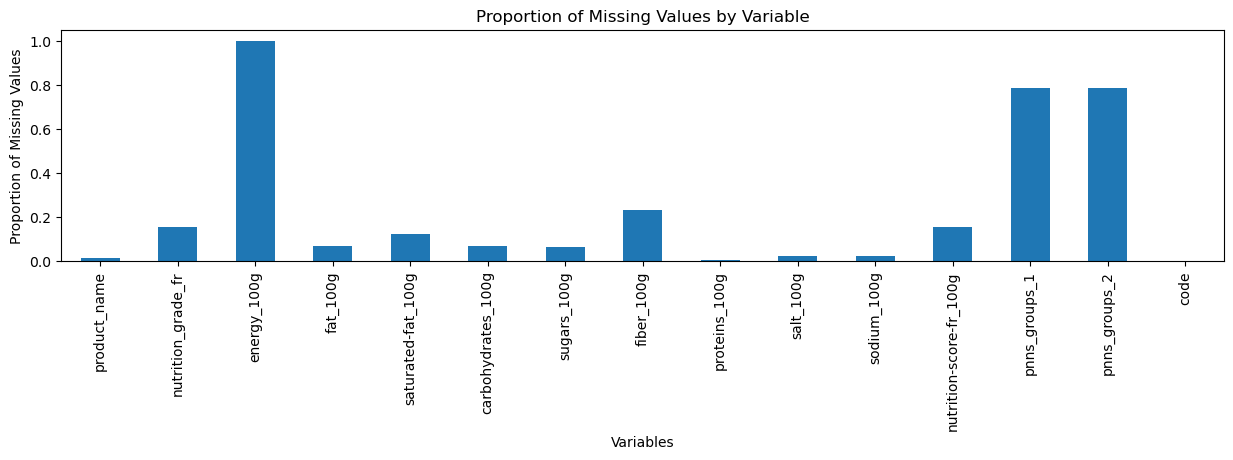

In [1036]:
plot_missing_data(products, "Variables")

### Removing products with little data

We will then drop all products with more than 60% of missing nutrition information:

In [1037]:
products_with_missing_data = products.loc[
    products[nutrition_facts].isna().mean(axis=1) > 0.6
]
products_with_missing_data

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
6,Organic Long Grain White Rice,NaN,NaN,NaN,NaN,80.0,NaN,NaN,8.89,NaN,NaN,NaN,NaN,NaN,16117
481,Organic Long Grain White Rice,NaN,NaN,NaN,NaN,80.0,NaN,NaN,8.89,NaN,NaN,NaN,NaN,NaN,16117
9,Organic Sunflower Oil,NaN,NaN,100.0,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16513
25,Real Salt Granular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.15678,37.857,NaN,NaN,NaN,18371
36,"Sweeteners, Demerara Turbinado Sugar",NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320503,Candia GrandLait,NaN,NaN,3.5,NaN,4.6,NaN,NaN,3.00,NaN,NaN,NaN,Milk and dairy products,Milk and yogurt,9501100460042
320507,Nectar de Mangue,NaN,NaN,1.0,NaN,14.0,NaN,NaN,0.10,NaN,NaN,NaN,Beverages,Fruit nectars,9504000004040
320508,DAFANI Cocktail Mangue Orange,NaN,NaN,0.1,NaN,14.0,NaN,NaN,0.10,NaN,NaN,NaN,Beverages,Fruit juices,9504000004057
320509,DAFANI Cocktail Mangue Ananas Fruit de la passion,NaN,NaN,0.1,NaN,13.4,NaN,NaN,0.14,NaN,NaN,NaN,Beverages,Fruit juices,9504000004064


In [1038]:
products_with_missing_data.shape[0] / (products.shape[0])

0.017988364972443355

In [1039]:
products = products.drop(products_with_missing_data.index)

In [1040]:
products.isna().mean().mean()

0.2275539792657261

In [1041]:
products.shape

(256580, 15)

Now that the major outliers have been corrected, we can create the first correlation matrix to see if any interesting relationships emerge from the nutrition data

In [1042]:
products.corr(numeric_only=True)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.756099,0.073364,0.487676,0.087451,0.016249,0.155621,-0.099900,-0.099893,-0.010521
fat_100g,0.756099,1.000000,0.690391,-0.091919,-0.049582,0.137863,0.238165,-0.052045,-0.053278,0.570523
saturated-fat_100g,0.073364,0.690391,1.000000,-0.053836,0.111170,-0.002281,0.153778,-0.023802,-0.023710,0.631475
carbohydrates_100g,0.487676,-0.091919,-0.053836,1.000000,0.671584,0.261019,-0.094079,-0.077747,-0.078749,0.261943
sugars_100g,0.087451,-0.049582,0.111170,0.671584,1.000000,-0.015906,-0.267532,-0.088498,-0.083771,0.469725
fiber_100g,0.016249,0.137863,-0.002281,0.261019,-0.015906,1.000000,0.233755,-0.014261,-0.015577,-0.150018
proteins_100g,0.155621,0.238165,0.153778,-0.094079,-0.267532,0.233755,1.000000,-0.002049,-0.007757,0.107719
salt_100g,-0.099900,-0.052045,-0.023802,-0.077747,-0.088498,-0.014261,-0.002049,1.000000,1.000000,0.125962
sodium_100g,-0.099893,-0.053278,-0.023710,-0.078749,-0.083771,-0.015577,-0.007757,1.000000,1.000000,0.119997
nutrition-score-fr_100g,-0.010521,0.570523,0.631475,0.261943,0.469725,-0.150018,0.107719,0.125962,0.119997,1.000000


The most interesting relationships are between saturated fats and the nutrition score, as a 0.6 suggests that the higher the amount of saturated fats, the higher the nutri score. 

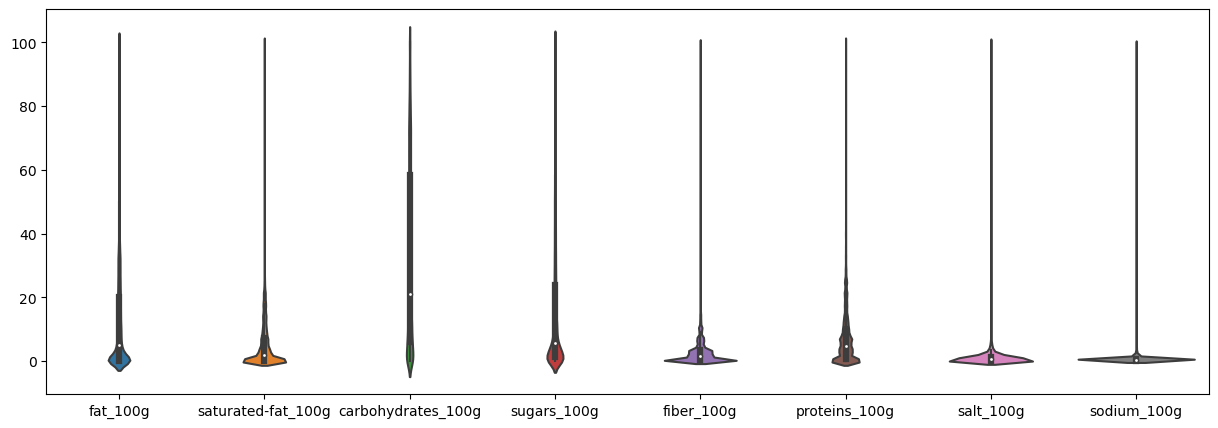

In [1043]:
plt.figure(figsize=[15, 5])
sns.violinplot(products[nutrition_facts])
plt.show()

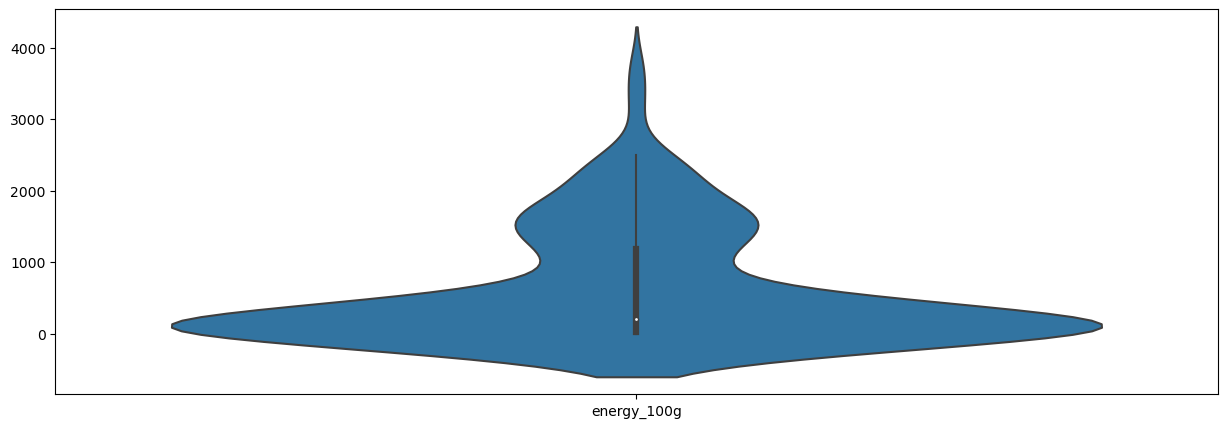

In [1044]:
plt.figure(figsize=[15, 5])
sns.violinplot(products[["energy_100g"]])
plt.show()

anova entre nutrition et category 
anova entre category et fat/carbs/sugar

pca sur toutes les valeurs numériques